In [1]:
import pandas as pd
import numpy as np
import yfinance
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [13]:
name = 'ETH-USD'
ticker = yfinance.Ticker(name)
eth = ticker.history(interval="1d",start="2021-01-01", end="2021-03-09")
eth['Date'] = pd.to_datetime(df.index)
eth['Date'] = eth['Date'].apply(mpl_dates.date2num)
eth = eth.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [15]:
eth

,Date,Open,High,Low,Close
Date,,,,,
2021-01-01,737791.0,737.708374,749.201843,719.792236,730.367554
2021-01-02,737792.0,730.402649,786.798462,718.109497,774.534973
2021-01-03,737793.0,774.511841,1006.565002,771.561646,975.507690
2021-01-04,737794.0,977.058838,1153.189209,912.305359,1040.233032
2021-01-05,737795.0,1041.498779,1129.371460,986.811279,1100.006104
...,...,...,...,...,...
2021-03-04,737853.0,1574.623779,1622.953857,1511.103394,1541.914307
2021-03-05,737854.0,1541.541748,1547.878174,1450.891357,1533.275024
2021-03-06,737855.0,1532.372803,1669.106567,1519.141113,1654.741577


In [16]:
def isSupport(df,i): #Create conditions for support
    support = eth['Close'][i] < eth['Close'][i-1]  and eth['Close'][i] < eth['Close'][i+1] and eth['Close'][i+1] < eth['Close'][i+2] and eth['Close'][i-1] < eth['Close'][i-2]
    return support
def isResistance(df,i): #create conditions for support
    resistance = eth['Open'][i] > eth['Open'][i-1]  and eth['Open'][i] > eth['Open'][i+1] and eth['Open'][i+1] > eth['Open'][i+2] and eth['Open'][i-1] > eth['Open'][i-2]
    return resistance

In [17]:
levels = [] #placeholder for levels
for i in range(2,eth.shape[0]-2):
    if isSupport(eth,i): #create levels for support
        levels.append((i,eth['Close'][i]))
    elif isResistance(eth,i): #create levels for resistance
        levels.append((i,eth['Open'][i]))

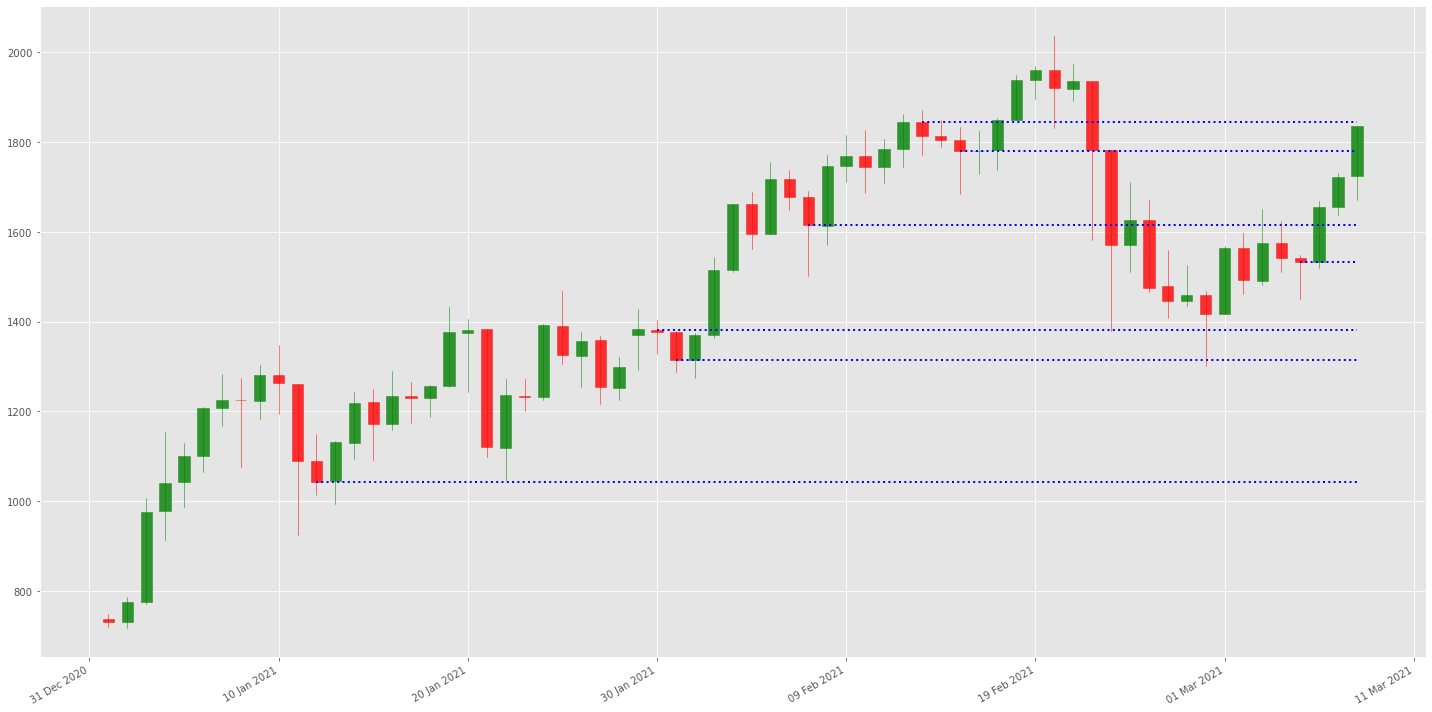

In [18]:
fig, ax = plt.subplots(figsize=(20,10))

candlestick_ohlc(ax,eth.values,width=0.6, colorup='green', colordown='red', alpha=0.8)
date_format = mpl_dates.DateFormatter('%d %b %Y') #convert numeric dates to dates 
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

for level in levels:
    plt.hlines(level[1],xmin=eth['Date'][level[0]], xmax=max(eth['Date']),colors='blue', linestyle='dotted', lw=2)